In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHot', oh_transformer, cat_features),
        ('StandardScaler', num_transformer, num_features)
    ]
)

In [6]:
X = preprocessor.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [12]:
def evavulate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [13]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K Neighbours Regressor':KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XG Boost': XGBRegressor(),
    'Cat Boost': CatBoostRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mae, train_rmse, train_r2 = evavulate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evavulate_model(y_test, y_test_pred)

    model_list.append(name)
    r2_list.append(test_r2)

    print(f"\n{name}")
    print("="*50)

    print("Model performance for Training set:")
    print(f"MAE:  {train_mae:.4f}")
    print(f"RMSE: {train_rmse:.4f}")
    print(f"R²:   {train_r2:.4f}")

    print("\nModel performance for Test set:")
    print(f"MAE:  {test_mae:.4f}")
    print(f"RMSE: {test_rmse:.4f}")
    print(f"R²:   {test_r2:.4f}")
    print("-"*50)


Linear Regression
Model performance for Training set:
MAE:  4.2788
RMSE: 5.3274
R²:   0.8741

Model performance for Test set:
MAE:  4.2259
RMSE: 5.4096
R²:   0.8797
--------------------------------------------------

Lasso
Model performance for Training set:
MAE:  5.2063
RMSE: 6.5938
R²:   0.8071

Model performance for Test set:
MAE:  5.1579
RMSE: 6.5197
R²:   0.8253
--------------------------------------------------

Ridge
Model performance for Training set:
MAE:  4.2650
RMSE: 5.3233
R²:   0.8743

Model performance for Test set:
MAE:  4.2111
RMSE: 5.3904
R²:   0.8806
--------------------------------------------------

K Neighbours Regressor
Model performance for Training set:
MAE:  4.5187
RMSE: 5.7122
R²:   0.8553

Model performance for Test set:
MAE:  5.6160
RMSE: 7.2516
R²:   0.7839
--------------------------------------------------

Decision Tree
Model performance for Training set:
MAE:  0.0187
RMSE: 0.2795
R²:   0.9997

Model performance for Test set:
MAE:  6.2550
RMSE: 7.9564
R²

## Linear Regression

In [14]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy: {score:.2f}")

Accuracy: 87.97


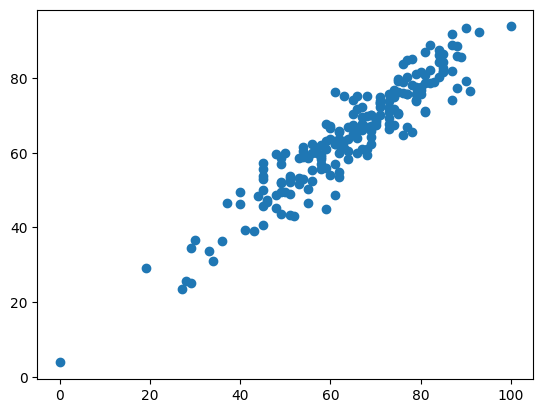

In [15]:
plt.scatter(y_test, y_pred);

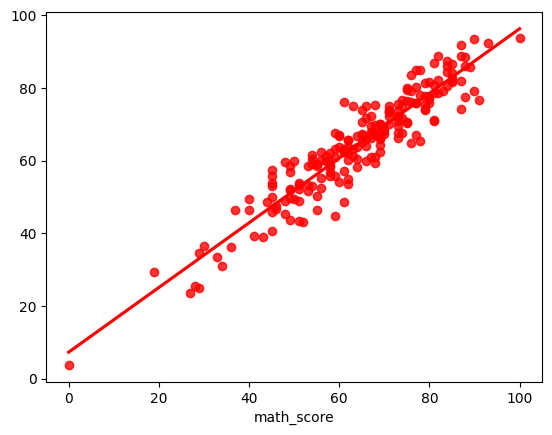

In [16]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red');